# Name - MEDHINI KULKARNI

# THE SPARKS FOUNDATION INTERNSHIP 

# GRIP DECEMBER 2020 

# TASK 2

# KMeans Clustering - Unsupervised ML - Iris Dataset

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
#Loading the Iris Dataset and displaying it using DataFrame
iris=datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
#Describing Data Attributres
features=iris.feature_names
target=iris.target_names
print(f"Feature names : {features}")
print(f"Target names : {target}")

Feature names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names : ['setosa' 'versicolor' 'virginica']


In [5]:
print(f"The dataset contains {iris_df.shape}")

The dataset contains (150, 4)


This means that the Dataset contains 150 flowers and 4 Features describing them each

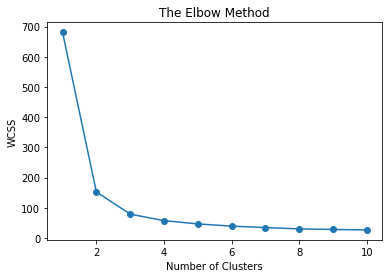

In [6]:
#To determine optimum no. of clusters
X = iris.data 
y = iris.target
from sklearn.cluster import KMeans
wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, using the 'elbow method'
plt.plot(range(1, 11), wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3. 

In [7]:
#Applying kMeans classifier with clusters=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(X)
print("Kmeans Classifier Applied")
print(f"Predictions are : {y_pred}")

Kmeans Classifier Applied
Predictions are : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


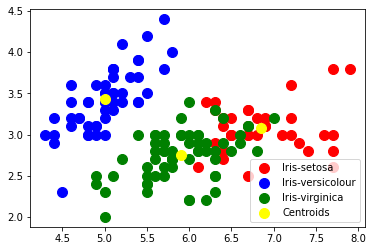

In [8]:
#Plotting the clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

We can see the 3 clusters formed in the above visualizations and their centroids (marked in yellow)

In [9]:
#Calculating Inertia of clusters
model = KMeans(n_clusters=3)
model.fit(X)
print(f"Inertia of this model = {kmeans.inertia_}")

Inertia of this model = 78.851441426146


In [10]:
#To match the learned cluster labels with the true labels found in them
from scipy.stats import mode
labels = np.zeros_like(y_pred)
for i in range(10):
   mask = (y_pred == i)
   labels[mask] = mode(iris.target[mask])[0]
    
#To find accuracy from above values
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(iris.target, labels)
print(f"The accuracy of this model = {round(accuracy*100)}%")

The accuracy of this model = 89.0%


We have thus, trained the unsupervised model using KMeans Clustering and obtained 89% accuracy.